### Lending Club: a default ratio prediction study

* [1. Background](#Background)
* [2. Data sources](#Data_sources)
* [3. Importing required libraries](#Library)
* [4. Openning the data file](#File)
* [5. Checking for the missing data](#Missing)
    * [5.1. What columns have the highest number of missing values](#MissingResult)
    * [5.2. What features (columns) are kept?](#keep)
    * [5.3 What features (columns) are dropped?](#Drop)
        * [5.3.1. General features and duplicate features](#General)
        * [5.3.2. Applicant credit performance during the life of loan](#Performance)
        * [5.3.3. Secondary applicants' data](#Secondary)
* [6. Checking the missing data in the truncated dataframe](#TruncatedMissing)
    * [6.1. Dropping columns with missing data](#cdrop)
    * [6.2. Dropping the rows with missing data](#ddrop)
* [7. Heat Map of the numerical features](#HM)
    * [7.1. What do we learn from the heat map?](#HML)
        * [7.1.1. Exploring low and high Fico score ranges](#Fico)
* [8. Histograms of numerical features](#Hist)
    * [8.1. What do we learn from histograms?](#HistL)
        * [8.1.1. Applicants with more than 10 bankruptcies](#BankR)
        * [8.1.2. Applicants with more than 250 utilization rate](#Util)
        * [8.1.3. Unusual number of collection in the last 12 months](#collection)
        * [8.1.4. Tax liens](#'lien')
        * [8.1.5. Very high revolving balance.](#delinquency)
        * [8.1.6. Unusual incomes!](#income)
* [9. Categorical features](#Cat)
    * [9.1. Loan status](#LoanStatus)
    * [9.2. Loan grade/subgrade distribution](#subgrade)
    * [9.3. Distribution of loan issuance year](#year)
    * [9.4. Home ownership status of applicant](#HomeOwnership)
    * [9.5. Loan term ](#term)
    * [9.6. Applicants' length of employment](#emp)
* [10. Summary](#Summary)
    
    





### 1. Background <a class="anchor" id="Background"></a>

LendingClub used to be the biggest peer to peer lending platform until 2020, when they changed their business focus. During its operation, LendingClub would establish a platform for borrowers and investors where borrowers were allowed to create loan requests on its website. They were also required to provide their information like credit score, credit history, desired loan amount and the debt-to-income ratio. Based on the data, LendingClub would decide if the loan request would be accepted and what the interest rate would be. Allowable loan range was between $1,000–40,000 and the return period was 3 or 5 years. Investors would make money from interest rates which were varied from 6.03% to 26.06%. LendingClub would make money from charging an origination fee to its borrowers and a service fee to its investors. The interest rates that LendingCub was offering were better for borrowers and lenders than most of banks and therefore, it was highly received. 

When a request was made, based on the requester’s information such as credit history, LendingClub would decide to either accept or reject the request. For the accepted loans, a credit grade ranging from A to G would be assigned. The credit grade along with other factors would determine the interest rate. For the rejected loan a risk score was assigned. Furthermore, the credit grade would also determine the amount of the origination fee that the requester would be charged, and it would be between 1.1–5.0% of the loan amount. The size of the service fee, that the investor would be charged, would be 1% of all amounts the borrower would pay, which was the requested amount plus the total interest. Therefore, higher interest rates would generate more revenue. However, higher interest rates also indicate a riskier loan which may end up on default and may cause investment loss for LendingClub. Therefore, having a method to predict the risk factor accurately is very desirable. Statistical data shows that about 10% of loans will be defaulted. The question is if we can have a better risk analysis method and ultimately a strong predictive model to decrease loan default ratio by 50% in the next three years.


### 2. Data sources <a class="anchor" id="Data_sources"></a>

The data is from Kaggle website and can be found here: All Lending Club loan data | Kaggle The data is in two files and originate from Lending Club and include information of rejected and accepted loan applications from 2007 to 2018. The accepted file has more than 2 million rows and 151 columns. It includes information about the applicant such as credit score, income and employment, as well as data about the loan, its amount and terms.  

### 3. Importing required libraries <a class="anchor" id="Library"></a>

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 4. Opening the data file <a class="anchor" id="File"></a>

In [135]:
# Opening the file and saving it as a pandas dataframe.
filepath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv"
dff = pd.read_csv(filepath)

In [136]:
# An excel file is available from LendingClub with the description of the variables in the data files. The excel sheet
# is downloaded below.
column_desc = pd.read_excel( 'https://resources.lendingclub.com/LCDataDictionary.xlsx', index_col= 'LoanStatNew')
column_desc = column_desc.iloc[:,0:1]

In [137]:
desc = pd.DataFrame(column_desc)
desc.head()

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...


### 5. Checking for the missing data <a class="anchor" id="Missing"></a>

In [138]:
# To decide what column to drop, one way is to look at what data is missing. A pandas data frame, missing, is created; 
# the first column is the number of missing values and the second column is the percentage. 

df = dff
missing1 = df.isnull().sum()
missing2 = 100*df.isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']

In [139]:
missing.sort_values("count", ascending=False)[0:60]

,count,%
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_end_date,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_type,2249784,99.517097
hardship_reason,2249784,99.517097
hardship_status,2249784,99.517097
deferral_term,2249784,99.517097
hardship_last_payment_amount,2249784,99.517097
hardship_payoff_balance_amount,2249784,99.517097


### 5.1. What columns have highest number of missing values? <a class="anchor" id="MissingResult"></a>
It can be seen that member_ids are all missing. Furthermore, there are more than 50 columns, that have more than 38% missing values. The common characteristic in these columns is that, they all are established after the origination of the loan. Therefore, they did not play any role in the loan application approval/rejection. These columns can be dropped.

Furthermore a few number of loans are joint loans and such loans have information (columns) relevent to the second applicant, which are missing for single applicants. I have decided to focus on single applicants, therefore, any columns regarding the second applicant are will be dropped. 


## 5.2. What features (columns) are kept? <a class="anchor" id="keep"></a>
Any feature which is established before the decision on the loan should be kept. Furthermore, features like loan amount,  interest rate and its term that reflect the decision on the loan should be kept. Also, it will be intersting to explore how applicants in different states perform. Therefore, applicant's satate of living is also kept. 

In [145]:
keeplist =['revol_util','dti', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'inq_last_6mths', 'earliest_cr_line', 
        'open_acc', 'mort_acc', 'annual_inc', 'issue_d', 'grade', 'sub_grade', 'funded_amnt', 'loan_status', 'installment', 'int_rate', 
        'verification_status', 'term', 'revol_bal', 'fico_range_high', 'fico_range_low', 'id', 'emp_length', 'home_ownership',
        'num_rev_accts', 'mths_since_last_major_derog', 'open_act_il', 'pub_rec_bankruptcies', 'tax_liens', 'addr_state', 'loan_amnt', 'funded_amnt_inv']

In [146]:
# The description of the kept columns are as follow:

column_desc.loc[keeplist]

,Description
LoanStatNew,
revol_util,"Revolving line utilization rate, or the amount..."
dti,A ratio calculated using the borrower’s total ...
chargeoff_within_12_mths,Number of charge-offs within 12 months
collections_12_mths_ex_med,Number of collections in 12 months excluding m...
inq_last_6mths,The number of inquiries in past 6 months (excl...
earliest_cr_line,The month the borrower's earliest reported cre...
open_acc,The number of open credit lines in the borrowe...
mort_acc,Number of mortgage accounts.
annual_inc,The self-reported annual income provided by th...


### 5.3. What features (columns) are dropped? <a class="anchor" id="Drop"></a>

#### 5.3.1.   General features and duplicate features <a class="anchor" id="General"></a>
member_id: it's the id each borrower (or member) in LendingClub is given and because the source data is deidentified, member_ids are removed before publicizing. So the whole column can be dropped. url, zip_code. loan_amount is similar to funded amount, so is dropped. funded_amnt_inv is the amount investors fund, does not affect decision and is dropped.

####  5.3.2.  Applicant credit performance during the life of loan <a class="anchor" id="Performance"></a>
Because we are trying to find a better model to decide about loan applications, any feature that is not defined prior to the decision on the loan application can be dropped. Many of the avialble features in the source data refer to th applicant credit card performance during the loan and are irrelavent for initial decision making. These feature include number of bank cards, number of mortages, installments, trades during the loan, delinquecies and etc.  
open_rv_24m,  open_rv_12m,  total_bal_il,  open_il_24m,	open_il_12m, open_act_il,  max_bal_bc, inq_fi,  mths_since_recent_inq, months_since_last_record,   mths_since_recent_bc_dlq,   mths_since_last_major_derog,   mths_since_recent_revol_delinq, next_pymnt_d,   mths_since_last_delinq,   il_util,   mths_since_rcnt_il,   all_util,  open_acc_6m,   total_cu_tl,  inq_last_12m. orig_projected_additional_accrued_interes: As the descriptive excel sheet describes this feature is the original projected additional interest amount that will accure for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan. So it's feature which is only available after application decision and in the case of the borrower's harship in returning the loan. hardship releven columns which include 
hardship_startdate, hardship_amount,  hardship_dpd, hardship_end_date, hardship_flag, hardship_last_payment_amount, hardship_length, hardship_loan_status, hardship_payoff_balance_amount, hardship_reason, hardship_start_date, hardship_status hardship_type, payment_plan_start_date, settlement_term, debt_settlement_flag_date, settlement_status	settlement_date, settlement_amount, settlement_percentage
####  5.3.3.  Secondary applicants' data <a class="anchor" id="Secondary"></a>
less than 5 percent of applications are joint. For now, I'd like to focus on single applications. Therefore, I'll drop any columns and rows with data of the second applicants. These columns are: sec_app_chargeoff_within_12_mths 
sec_app_collections_12_mths_ex_med ,sec_app_earliest_cr_line, sec_app_fico_range_high, sec_app_fico_range_low, sec_app_inq_last_6mths, sec_app_mort_acc, sec_app_mths_since_last_major_derog, sec_app_num_rev_accts, sec_app_open_acc, sec_app_open_act_il, sec_app_revol_util, revol_bal_joint, verification_status_joint, dti_joint, annual_inc_joint, desc 

In [147]:
# Before dropping unwanted columns, first joint application rows are dropped, and the truncated data is assigned to a new data frame. 


df =dff[ dff['application_type'] == "Individual"]
print(df.shape)
df['application_type'].unique()

(2139958, 151)


array(['Individual'], dtype=object)

In [148]:
# Dropping irrelevant columns as disscussed.

df = df[keeplist]
df.shape

(2139958, 32)

## 6. Checking the missing data in the truncated dataframe <a class="anchor" id="TruncatedMissing"></a>
Now that  more than 100 columns and some rows are dropped, it is important to check the missing data. As it is shown in the table below mths_since_last_major_derog and open_act_il each has 74% and 38% missing data points. Employment length hasabout 6% missing. revolving utility rate and banckrupcy records have about 0.07% (1000) missing points. mths_since_last_major_derog and open_act_il columns will be dropped.

In [149]:
missing.loc[['revol_util','dti', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'inq_last_6mths', 'earliest_cr_line', 
        'open_acc', 'mort_acc', 'annual_inc', 'issue_d', 'sub_grade', 'funded_amnt', 'funded_amnt_inv','loan_status', 'installment', 'int_rate', 
        'verification_status', 'term', 'revol_bal', 'fico_range_high', 'fico_range_low', 'id', 'emp_length', 'home_ownership',
        'num_rev_accts', 'mths_since_last_major_derog', 'open_act_il', 'pub_rec_bankruptcies', 'tax_liens', 'loan_amnt'],'%']

revol_util                      0.081170
dti                             0.077144
chargeoff_within_12_mths        0.007874
collections_12_mths_ex_med      0.007874
inq_last_6mths                  0.002787
earliest_cr_line                0.002743
open_acc                        0.002743
mort_acc                        2.214490
annual_inc                      0.001637
issue_d                         0.001460
sub_grade                       0.001460
funded_amnt                     0.001460
funded_amnt_inv                 0.001460
loan_status                     0.001460
installment                     0.001460
int_rate                        0.001460
verification_status             0.001460
term                            0.001460
revol_bal                       0.001460
fico_range_high                 0.001460
fico_range_low                  0.001460
id                              0.000000
emp_length                      6.499754
home_ownership                  0.001460
num_rev_accts   

#### 6.1. Dropping columns with missing data <a class="anchor" id="cdrop"></a>

In [150]:
## Dropping  mths_since_last_major_derog and open_act_il 

df.drop(columns=['mths_since_last_major_derog', 'open_act_il'], inplace= True)

#### 6.2. Dropping the rows with missing data <a class="anchor" id="ddrop"></a>
 Employment length has about 6% missing data. revolving utility rate and banckrupcy records have about 0.07% (1000) missing points. Rows with missing data are dropped

In [151]:
# Dropping the applications with missing data and checking the dimension.
df = df.dropna()
df.shape

(1940046, 30)

## 7. Heat Map of the numerical features <a class="anchor" id="HM"></a>

To check if there is any correlation between numerical features, they are separated from the rest and a heat map is plotted.

In [152]:
dffloat = df.select_dtypes(np.number)
dffloat.shape

(1940046, 19)

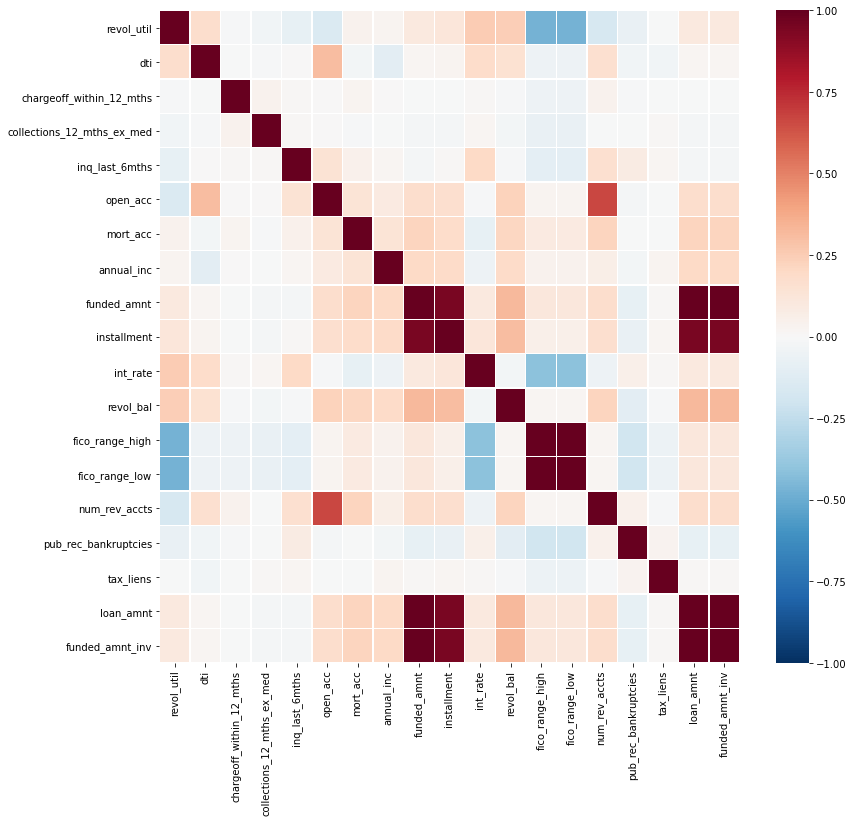

In [162]:
# Show a seaborn heatmap of correlations in dffloat
# Calling pandas' `corr()` method on `dffloat` and pass that into `sns.heatmap`
plt.figure(figsize = (13,12))
corr = dffloat.corr()
sns.heatmap(corr ,xticklabels=corr.columns, yticklabels=corr.columns,cmap="RdBu_r",linewidths=.3,vmin=-1, vmax=1);


## 7.1. What do we learn from the heat map? <a class="anchor" id="HML"></a>
1. _'fico_range_low'_ and _'fico_range_high'_ are highly correlated, so probably an average value can replace the low and high ranges. 

2. _'funded_amount'_ , _loan_amount'_ and _'funded_amnt_inv'_ are HIGHLY correlated. Therefore, I will drop two of them.

3. _'installment'_ and _'funded amount'_ are correlated, which is expected.

4. open account is correlated with number of revolving account, which is not surprising. 



#### 7.1.1. Exploring low and high Fico score ranges <a class="anchor" id="Fico"></a>

A FICO score, is a numerical score that determines how likely a consumer will pay his or her bills. The scores are compiled by a company called Fair Isaac & Co., which began developing credit scores in the latter part of the 1950s. It ranges from 300 to 850, with 850 considered a perfect score. The higher your score, the better your odds of being approved for loans and lines of credit at the most favorable interest rates. 

It is important to check if the reported high Fico range is higher than the reported low Fico range. To check this the difference of the two columns are estimated. It can be seen that there is not a negative difference.


In [163]:
df.loc[df['fico_range_high']-df['fico_range_low'] < 0, ['id']].value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [id]
Index: []>

## 8. Histograms of numerical features <a class="anchor" id="Hist"></a>

Now, the distributions of the data are plotted to see if there is any abnormalities.

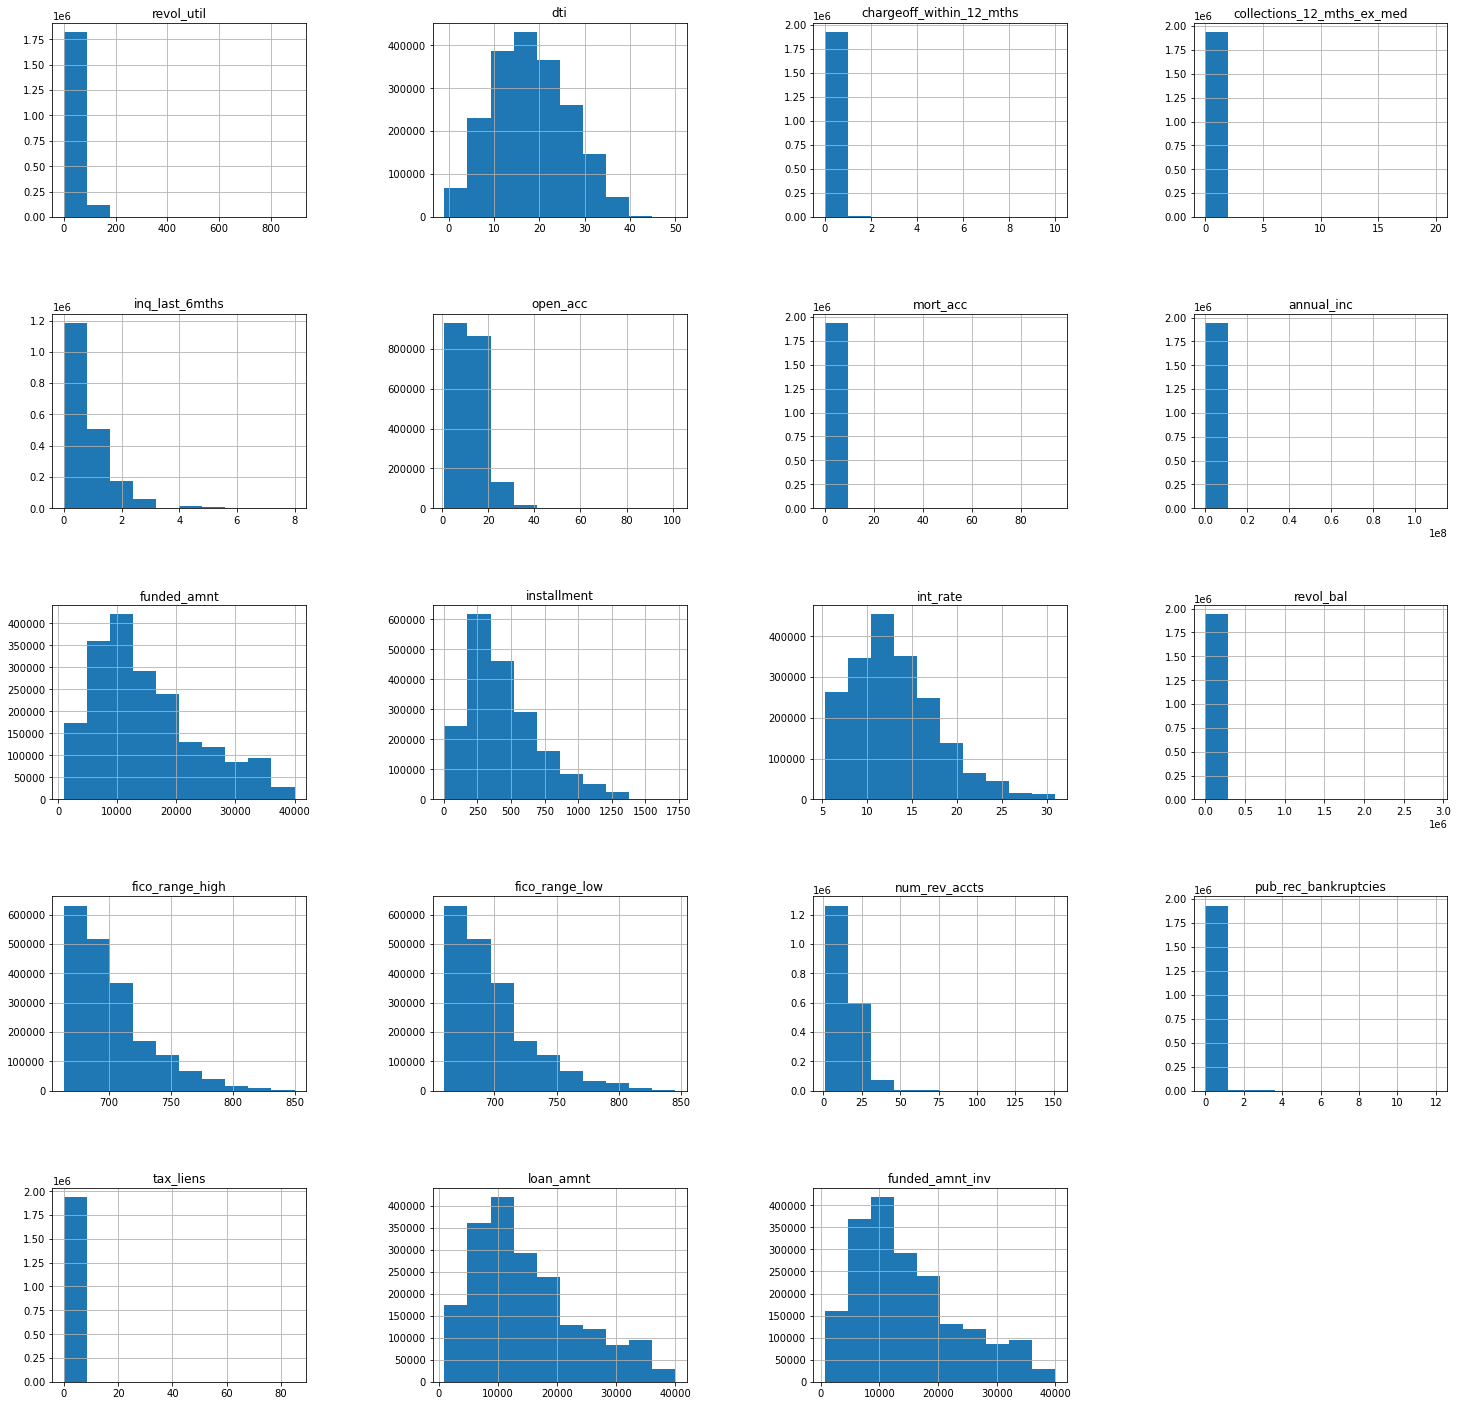

In [164]:
df.select_dtypes(np.number).hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5, wspace=.5);

## 8.1. What do we learn from histograms? <a class="anchor" id="HistL"></a>

Some features have values that are clustered down the low end such as revol_bal and annual_inc and need extra work to make sure they are indeed correct and are not entered by mistake.



#### 8.1.1. Applicants with more than 10 bankruptcies <a class="anchor" id="BankR"></a>
There are two applicants with more than 10 bancruptcies but as shown in the table, these numbers are smaller than the total public records so, they are probably correct.

In [165]:
dff.loc[dff['pub_rec_bankruptcies'] > 10, ['pub_rec_bankruptcies','pub_rec']]

,pub_rec_bankruptcies,pub_rec
420591,11.0,12.0
1175624,12.0,12.0


#### 8.1.2. Applicants with more than 100 utilization rate <a class="anchor" id="Util"></a>
There are some applicants with more than 100 utilization rate. In order to find out if they are correct, I looked at the original data frame and I manually estimated utilization rate, which is the ratio of revolving balance to the credit limit. As shown below, the estimated values are equal to reported revol_util. Furthermore, the amount open to buy, is zero, which is another indication that the utilization rate is higher than 100%.

In [166]:
unusual_util = dff.loc[dff['revol_util']>100, ['revol_util', 'bc_util', 'all_util', 'il_util','revol_bal', 'total_rev_hi_lim', 'total_bal_il', 
                                'num_il_tl', 'tot_cur_bal', 'total_bal_ex_mort', 'bc_open_to_buy']]
unusual_util['ratio'] =unusual_util['revol_bal']/unusual_util['total_rev_hi_lim']*100
unusual_util.loc[unusual_util['revol_util']>250]

,revol_util,bc_util,all_util,il_util,revol_bal,total_rev_hi_lim,total_bal_il,num_il_tl,tot_cur_bal,total_bal_ex_mort,bc_open_to_buy,ratio
1254597,366.6,73.2,NaN,NaN,2566.0,700.0,NaN,7.0,17390.0,17390.0,134.0,366.571429
1292903,892.3,NaN,NaN,NaN,2677.0,300.0,NaN,3.0,5668.0,5668.0,NaN,892.333333


In [167]:
unusual_util.loc[(unusual_util['ratio'] - unusual_util['revol_util']) > 10, 'revol_util'].count()

4

In [168]:
unusual_util.loc[(unusual_util['ratio'] - unusual_util['revol_util']) > 10]

,revol_util,bc_util,all_util,il_util,revol_bal,total_rev_hi_lim,total_bal_il,num_il_tl,tot_cur_bal,total_bal_ex_mort,bc_open_to_buy,ratio
414825,101.9,101.9,NaN,NaN,45638.0,40500.0,NaN,15.0,200368.0,200368.0,0.0,112.686420
635341,101.8,101.8,102.0,NaN,29718.0,25700.0,0.0,1.0,227712.0,29718.0,0.0,115.634241
863626,100.9,100.9,101.0,NaN,12053.0,10600.0,30494.0,4.0,331350.0,42547.0,0.0,113.707547
1307297,103.4,129.8,NaN,NaN,69556.0,47200.0,NaN,12.0,188670.0,78627.0,0.0,147.364407


#### 8.1.3. Unusual number of collections in the last 12 months <a class='anchor' id='collection'></a>
There are some loans with more than 10 collections. Except for one (id = 25687085), they all have many delinquency occurance, which can result is collection.

In [169]:
dff.loc[dff['collections_12_mths_ex_med'] >10, ['id', 'collections_12_mths_ex_med','delinq_2yrs', 'acc_now_delinq', 'num_accts_ever_120_pd',
                                               'num_tl_120dpd_2m', 'num_tl_30dpd','num_tl_90g_dpd_24m',  'num_tl_op_past_12m',
                                                'pct_tl_nvr_dlq', 'chargeoff_within_12_mths']].T

,357772,729028,1020356,1092676,1169245,1197101,1701411
id,42453230,77271310,74512391,69454968,30805669,25687085,97504006
collections_12_mths_ex_med,14.0,20.0,11.0,12.0,16.0,20.0,12.0
delinq_2yrs,14.0,0.0,22.0,12.0,0.0,1.0,11.0
acc_now_delinq,14.0,0.0,0.0,0.0,0.0,0.0,0.0
num_accts_ever_120_pd,28.0,0.0,0.0,0.0,33.0,0.0,0.0
num_tl_120dpd_2m,0.0,0.0,NaN,NaN,0.0,0.0,NaN
num_tl_30dpd,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_tl_90g_dpd_24m,14.0,0.0,22.0,12.0,0.0,0.0,11.0
num_tl_op_past_12m,1.0,2.0,6.0,12.0,0.0,1.0,1.0
pct_tl_nvr_dlq,100.0,100.0,32.0,100.0,45.0,95.8,100.0


#### 8.1.4. Tax liens <a class='anchor' id='lien' ></a>
The histogram of the tax liens is clustered on the lower end. Tax liens are public records, so they should also be counted in public records.  As shown below, the are not any entry with tax liens higher than public record. Therefore, these entries can be correct. 

In [170]:
dff.loc[dff['tax_liens'] > dff['pub_rec']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


#### 8.1.5. Very high revolving balance. 
There are some very high revolving balance. When I looked closer, they are legit. The applicants have high credit limit that makes the balance possible. <a class='anchor' id='delinquency'></a>


In [171]:
ur = dff.loc[dff['revol_bal']>500000, ['total_rev_hi_lim','tot_hi_cred_lim','total_bc_limit', 'revol_bal','revol_util', 'id']]
print(ur.shape)
ur.loc[ur['revol_bal']/ur['tot_hi_cred_lim']>1]

(334, 6)


,total_rev_hi_lim,tot_hi_cred_lim,total_bc_limit,revol_bal,revol_util,id
1049835,511900.0,533767.0,3000.0,556406.0,57.6,72632726
1050683,516340.0,563156.0,11310.0,661023.0,128.0,71794964


#### 8.1.6. Unusual incomes! <a class='anchor' id='income'></a>
There are some very high incomes (> 1M), however, they are verified and I cannot drop them. Although, it is strange some one with more than a 1M income look for a 10K loan! However, according to the source file, these incomed are verified and must be correct.

In [172]:
df.loc[df['annual_inc']>1000000].T

,6975,7239,10404,19142,22022,24659,25315,29400,29797,30160,...,2219486,2222264,2224570,2226852,2231067,2231355,2241495,2243244,2244604,2255369
revol_util,6.5,6.7,97.4,29.3,44.6,44.9,88.0,91.2,62.2,58.1,...,76.4,70.6,40.5,30.8,86.3,77.4,92.9,85.7,94.4,30.3
dti,0.07,0.05,2.39,1.3,1.31,0.18,0.39,0.11,20.95,2.48,...,1.2,0.47,0.15,10.56,6.88,3.27,0.25,4.87,0.14,7.08
chargeoff_within_12_mths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
collections_12_mths_ex_med,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
inq_last_6mths,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
earliest_cr_line,Sep-2004,Mar-2003,Mar-2000,Apr-2003,Feb-1995,Jun-1993,Jul-2006,Aug-2005,May-1992,Jan-2004,...,Sep-1999,Feb-2003,Aug-1986,Mar-1987,May-1998,Jun-1993,Jan-2007,Nov-2010,Mar-2005,Jun-1979
open_acc,10.0,5.0,8.0,17.0,12.0,20.0,9.0,11.0,18.0,4.0,...,3.0,9.0,11.0,19.0,13.0,41.0,10.0,10.0,6.0,26.0
mort_acc,2.0,0.0,4.0,3.0,4.0,4.0,0.0,0.0,3.0,0.0,...,0.0,0.0,4.0,11.0,0.0,7.0,4.0,1.0,0.0,4.0
annual_inc,1400000.0,3964280.0,2300000.0,1248000.0,2500000.0,8700000.0,1900021.0,6000000.0,1200000.0,1500000.0,...,1200000.0,5588951.0,6500000.0,1900000.0,1100000.0,2100000.0,5541120.0,1100000.0,7000000.0,1750000.0
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,...,Nov-2016,Nov-2016,Nov-2016,Nov-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016


## 9. Categorical features <a class="anchor" id="Cat"></a>

### 9.1. Loan status <a class="anchor" id="LoanStatus"></a>
Almost half of loans in our dataframe are paid in full. From the rest about 800,000 are current and more than 200,000 of loans are charged off, which is an early indication of default. There is only 30 loans with default status. 

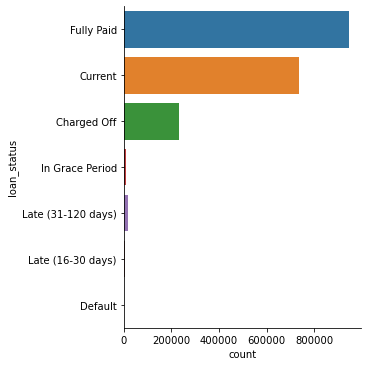

In [173]:
sns.catplot(y="loan_status",data=df, kind="count")

In [174]:
df['loan_status'].value_counts()

Fully Paid            946258
Current               733287
Charged Off           232291
Late (31-120 days)     17794
In Grace Period         6903
Late (16-30 days)       3483
Default                   30
Name: loan_status, dtype: int64

### 9.2. Loan grade/subgrade distribution <a class='anchor' id='subgrade'></a>

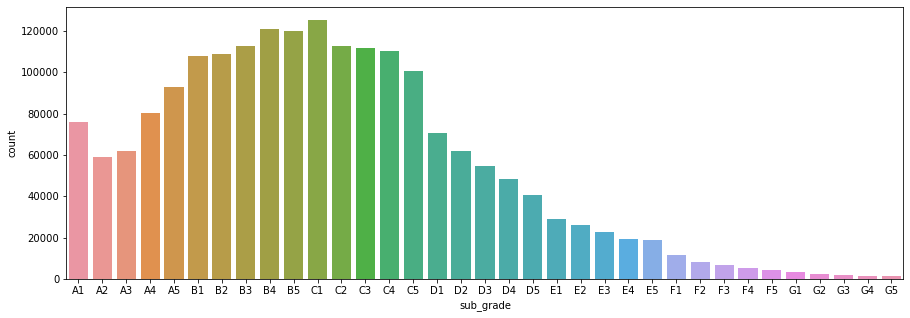

In [175]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x=df["sub_grade"],ax=ax,order=['A1','A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
                                            'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
                                            'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'])
plt.show()

### 9.3. Distribution of loan issuance year <a class='anchor' id='year'></a>
The column in the dataframe is a combination of month-year, the year is extracted from the column and add it to the data frame as 'year'.

In [176]:
# Extracting year
df["issue_year"] = df["issue_d"].str[4:]

<AxesSubplot:xlabel='issue_year', ylabel='count'>

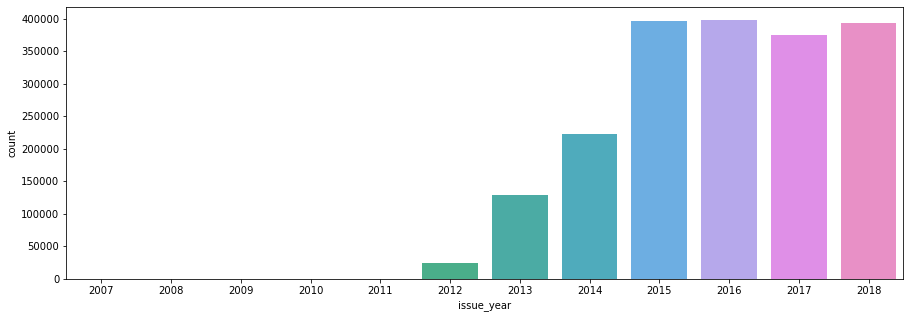

In [177]:
# Plotting the distribution of the year
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x="issue_year", data=df, ax=ax, order=["2007", '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

### 9.4. Home ownership status of applicant <a class='anchor' id='HomeOwnership'></a>

In [180]:
df['home_ownership'].replace(['ANY', 'NONE'], 'OTHER', inplace=True)
df['home_ownership'].value_counts()

MORTGAGE    943456
RENT        786850
OWN         208815
OTHER          925
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

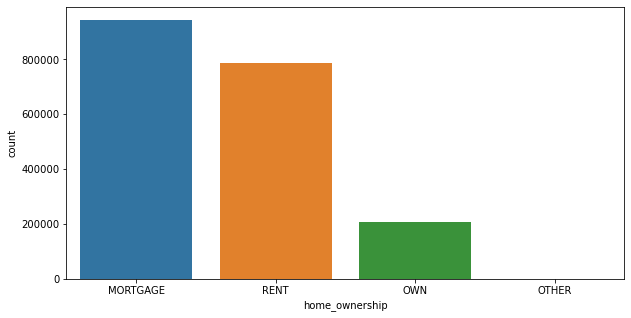

In [181]:
# Plotting home_ownership
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="home_ownership", data=df, ax=ax)

### 9.5. Loan term <a class='anchor' id='term'></a>

As it is shown below, loans are either 36 or 60 months.

<AxesSubplot:xlabel='term', ylabel='count'>

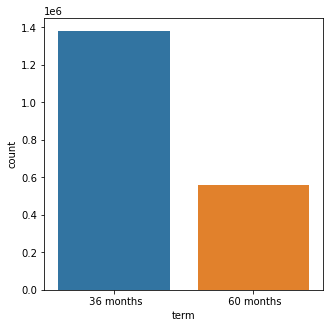

In [182]:
# Plotting loans' term
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x="term",data=df, ax=ax)

### 9.6. Applicants' length of employment <a class='anchor' id='emp'></a>

<AxesSubplot:xlabel='emp_length', ylabel='count'>

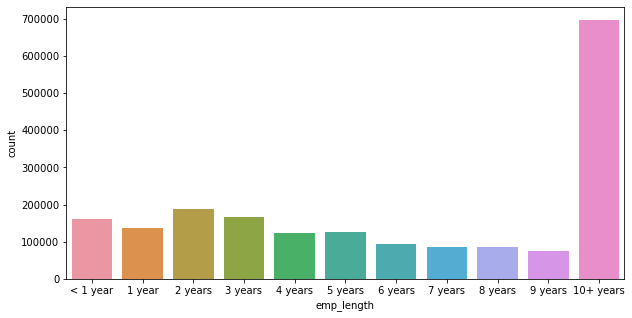

In [183]:
# Plotting employment length
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="emp_length", data=df, ax=ax, order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years',
                                                    '7 years', '8 years', '9 years', '10+ years'])

In [184]:
dff['emp_length'].replace('< 1 year', '1 year down', inplace=True)
dff['emp_length'].replace('10+ years', '10 years up', inplace=True)

## 10. Summary <a class='anchor' id='Summary'></a>
The original data file of the accepted loans has 151 columns and more than 2 million rows. Any columns that was not established prior to the decision was dropped. The focus is on the single applicants, therefore, join applications were also dropped. 

A heat map of the numerical  features show that 'fico_range_low' and 'fico_range_high' were highly correlated, as well as,
'installment' and 'funded amount', which is expected.

Histograms of the distributions of features did not show any abnormalities. 
catagorical data including loan_status and employment length were also plotted. Almost half of loans in our dataframe are paid in full. From the rest about 750,000 are current and more than 200,000 of loans are charged off, which is an early indication of default. There is only 30 loans with default status. 


##### Saving the new truncated data frame
The final clean data frame is saved as a new file. 

In [185]:
# Saving the new dataframe for easy future references:

SavePath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\TruncatedData.csv"
df.to_csv(SavePath, sep ='\t')